In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import bootcampviztools as bt

# Descripción de las Columnas del Dataset

| **Columna**               | **Descripción** |
|---------------------------|----------------|
| `Applicant_ID`            | Identificador único de cada solicitante. |
| `Applicant_Gender`        | Género del solicitante (`M` para masculino, `F` para femenino). |
| `Owned_Car`              | Indica si el solicitante posee un coche (`1` para sí, `0` para no). |
| `Owned_Realty`           | Indica si el solicitante posee una propiedad inmobiliaria (`1` para sí, `0` para no). |
| `Total_Children`         | Número total de hijos del solicitante. |
| `Total_Income`           | Ingreso total anual del solicitante. |
| `Income_Type`            | Tipo de fuente de ingresos del solicitante (por ejemplo, "Working", "State Servant", "Commercial associate"). |
| `Education_Type`         | Nivel de educación del solicitante (por ejemplo, "Higher education", "Secondary education"). |
| `Family_Status`          | Estado civil del solicitante (por ejemplo, "Married", "Single", "Widow"). |
| `Housing_Type`           | Tipo de vivienda en la que reside el solicitante (por ejemplo, "House / apartment", "Municipal apartment"). |
| `Owned_Mobile_Phone`     | Indica si el solicitante posee un teléfono móvil (`1` para sí, `0` para no). |
| `Owned_Work_Phone`       | Indica si el solicitante posee un teléfono de trabajo (`1` para sí, `0` para no). |
| `Owned_Phone`            | Indica si el solicitante posee otro teléfono adicional (`1` para sí, `0` para no). |
| `Owned_Email`            | Indica si el solicitante posee un correo electrónico (`1` para sí, `0` para no). |
| `Job_Title`              | Cargo o título profesional del solicitante (por ejemplo, "Accountants", "Laborers", "Managers"). |
| `Total_Family_Members`   | Número total de miembros en la familia del solicitante. |
| `Applicant_Age`          | Edad del solicitante en años. |
| `Years_of_Working`       | Años de experiencia laboral del solicitante. |
| `Total_Bad_Debt`         | Cantidad total de deudas incobrables del solicitante. |
| `Total_Good_Debt`        | Cantidad total de deudas bien gestionadas del solicitante. |
| `Status`                 | Estado del solicitante (`1` para aprobado, `0` para rechazado). |

In [2]:
data = pd.read_csv("./data/Application_Data.csv")

In [3]:
df = data.copy()

In [4]:
df.head(5)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [6]:
df["Status"].value_counts(normalize=True)

Status
1    0.995185
0    0.004815
Name: proportion, dtype: float64

In [7]:
target = "Status"

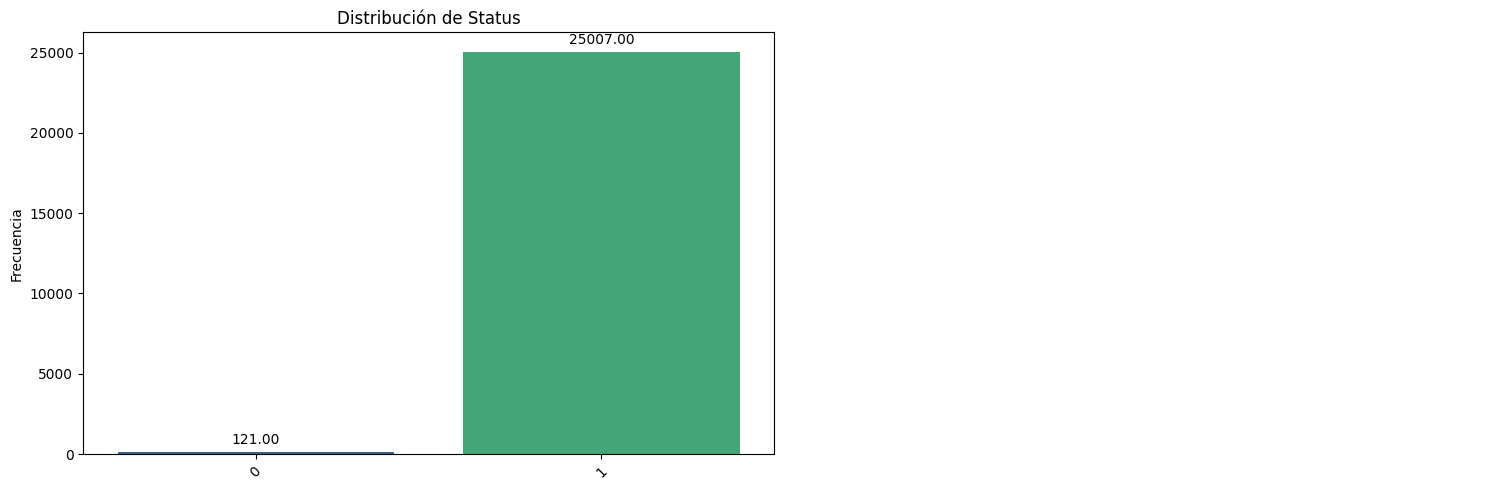

In [8]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores= True)

# 1. División en train y test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), 
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20102, 20)
(20102,)
(5026, 20)
(5026,)


# 2. MiniEDA

## 2.1. Variables Numéricas

In [11]:
df.drop(['Applicant_ID'], axis=1, inplace=True)
X_train.drop(['Applicant_ID'], axis=1, inplace=True)

In [12]:
numeric_cols = df.select_dtypes(include=['int64']).columns
numeric_cols

Index(['Owned_Car', 'Owned_Realty', 'Total_Children', 'Total_Income',
       'Owned_Mobile_Phone', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'Status'],
      dtype='object')

In [13]:
corr = np.abs(df[numeric_cols].corr()[target]).sort_values(ascending=False)
corr

Status                  1.000000
Total_Bad_Debt          0.458497
Total_Good_Debt         0.074516
Years_of_Working        0.021382
Total_Children          0.011036
Applicant_Age           0.010078
Total_Family_Members    0.010056
Owned_Email             0.009203
Owned_Work_Phone        0.005318
Owned_Phone             0.004323
Total_Income            0.003482
Owned_Realty            0.002716
Owned_Car               0.001604
Owned_Mobile_Phone           NaN
Name: Status, dtype: float64

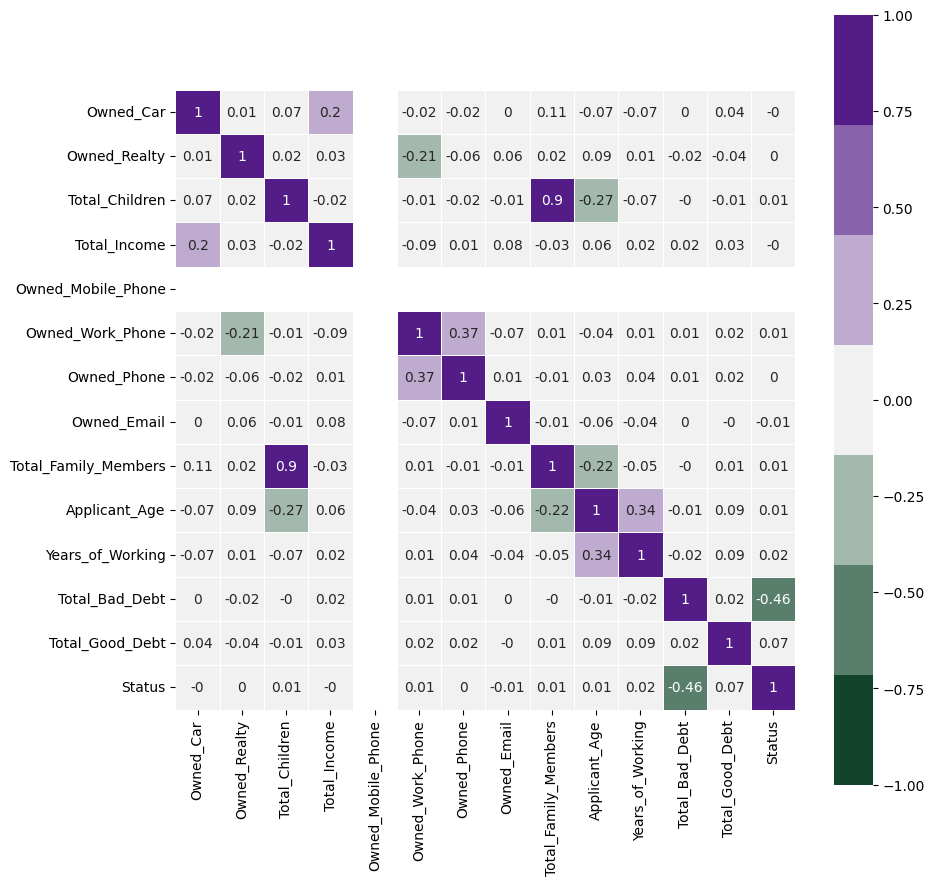

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[numeric_cols].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [15]:
# Features con menos de 0.05 de correlación vs el target
bad_corr_feat = corr[corr < 0.01].index.values
good_corr_feat = corr[corr > 0.01].index.values

# Filtramos y eliminamos las columnas(Features) con con menos de 0.05 de correlación vs el target
X_train.drop(columns=bad_corr_feat, inplace=True)

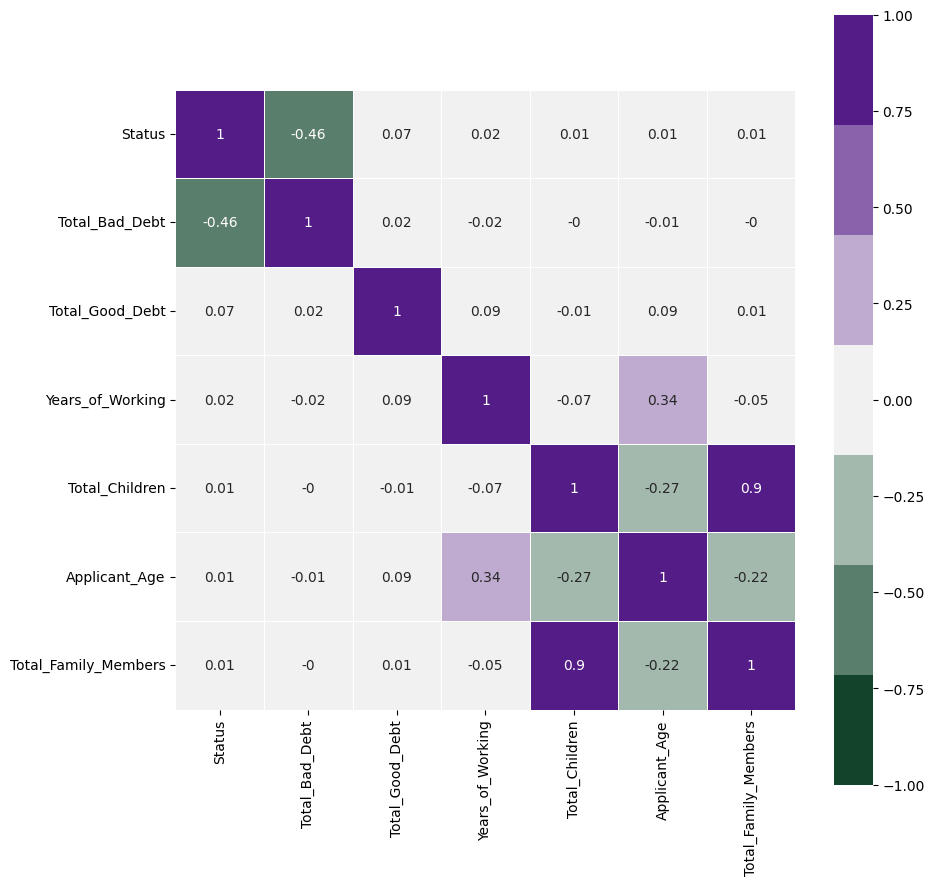

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[good_corr_feat].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [17]:
features_num = [col for col in good_corr_feat if target not in col]
features_num

['Total_Bad_Debt',
 'Total_Good_Debt',
 'Years_of_Working',
 'Total_Children',
 'Applicant_Age',
 'Total_Family_Members']

array([[<Axes: title={'center': 'Total_Bad_Debt'}>,
        <Axes: title={'center': 'Total_Good_Debt'}>],
       [<Axes: title={'center': 'Years_of_Working'}>,
        <Axes: title={'center': 'Total_Children'}>],
       [<Axes: title={'center': 'Applicant_Age'}>,
        <Axes: title={'center': 'Total_Family_Members'}>]], dtype=object)

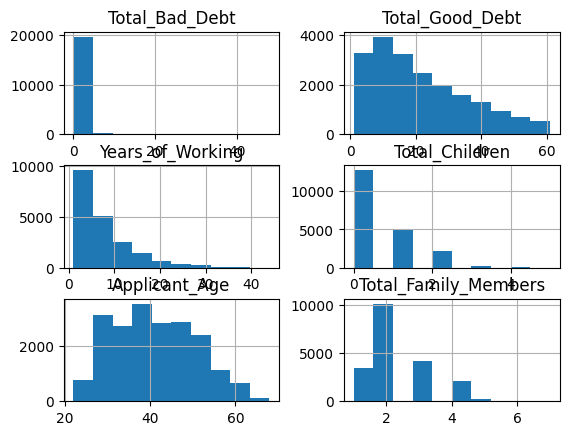

In [18]:
X_train[features_num].hist()

In [19]:
X_train[features_num].describe()

,Total_Bad_Debt,Total_Good_Debt,Years_of_Working,Total_Children,Applicant_Age,Total_Family_Members
count,20102.000000,20102.000000,20102.000000,20102.000000,20102.000000,20102.000000
mean,0.336633,21.063626,7.706447,0.508905,41.036812,2.289772
std,1.560243,14.711560,6.447759,0.762991,9.555399,0.928761
min,0.000000,1.000000,1.000000,0.000000,22.000000,1.000000
25%,0.000000,9.000000,3.000000,0.000000,33.000000,2.000000
50%,0.000000,18.000000,6.000000,0.000000,40.000000,2.000000
75%,0.000000,31.000000,10.000000,1.000000,48.000000,3.000000
max,48.000000,61.000000,44.000000,5.000000,68.000000,7.000000


In [20]:
features_num_log = ["Total_Good_Debt", "Years_of_Working", "Applicant_Age", "Total_Family_Members"]

array([[<Axes: title={'center': 'Total_Good_Debt'}>,
        <Axes: title={'center': 'Years_of_Working'}>],
       [<Axes: title={'center': 'Applicant_Age'}>,
        <Axes: title={'center': 'Total_Family_Members'}>]], dtype=object)

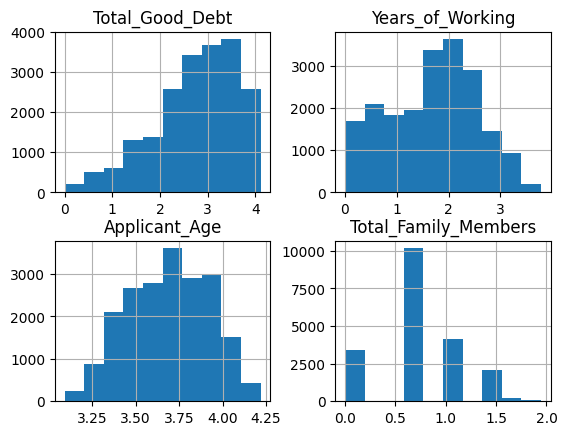

In [21]:
for col in features_num_log: # Aplicamos log a las features buscando una forma más normalizada
    X_train[col] = X_train[col].apply(np.log) 
X_train[features_num_log].hist()

In [22]:
X_train[features_num_log].describe()

,Total_Good_Debt,Years_of_Working,Applicant_Age,Total_Family_Members
count,20102.000000,20102.000000,20102.000000,20102.000000
mean,2.739813,1.708002,3.686915,0.744354
std,0.871345,0.856069,0.236436,0.419706
min,0.000000,0.000000,3.091042,0.000000
25%,2.197225,1.098612,3.496508,0.693147
50%,2.890372,1.791759,3.688879,0.693147
75%,3.433987,2.302585,3.871201,1.098612
max,4.110874,3.784190,4.219508,1.945910


In [23]:
features_num = ["Total_Bad_Debt", "Total_Good_Debt", "Years_of_Working", "Total_Children", "Applicant_Age", "Total_Family_Members"]

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(X_train[features_num]) 
X_train[features_num] = pd.DataFrame(scaler.transform(X_train[features_num]), columns = features_num)

In [25]:
X_train.describe()

,Total_Children,Owned_Mobile_Phone,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
count,16063.000000,20102.0,16063.000000,16063.000000,16063.000000,16063.000000,16063.000000
mean,0.004771,1.0,0.005293,-0.005218,0.000435,0.002939,-0.002208
std,0.999738,0.0,0.999420,1.002163,0.998442,1.003805,1.002739
min,-0.667003,1.0,-1.773559,-2.520287,-1.995217,-0.215762,-3.144426
25%,-0.667003,1.0,-0.122010,-0.805342,-0.711864,-0.215762,-0.622717
50%,-0.667003,1.0,-0.122010,0.008309,0.097842,-0.215762,0.172794
75%,0.643661,1.0,0.844084,0.779452,0.694568,-0.215762,0.796690
max,5.886317,1.0,2.862925,2.252641,2.425317,30.549451,1.573539


## Aplicamos transformaciones a test

In [26]:
X_test.drop(['Applicant_ID'], axis=1, inplace=True)

X_test.drop(columns=bad_corr_feat, inplace=True)

for col in features_num_log: # Aplicamos log a las features buscando una forma más normalizada
    X_test[col] = X_test[col].apply(np.log) 


X_test[features_num] = pd.DataFrame(scaler.transform(X_test[features_num]), columns = features_num)

## 2.1. Variables Categóricas

In [27]:
features_cat = X_train.select_dtypes(include=['object']).columns
features_cat

Index(['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Job_Title'],
      dtype='object')

In [28]:
X_train[features_cat]

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
14611,M,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Drivers ...
15058,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Core staff ...
20438,M,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Managers ...
16315,F,Working ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,Laborers ...
14241,M,Working ...,Higher education ...,Married ...,House / apartment ...,Core staff ...
...,...,...,...,...,...,...
21575,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Accountants ...
5390,M,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Laborers ...
860,M,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,Drivers ...
15795,M,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Laborers ...


In [29]:
from sklearn.preprocessing import OneHotEncoder
X_train = pd.get_dummies(X_train, columns=features_cat,dtype=int)
df.head(5)

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Security staff ...,2,59,4,0,30,1
1,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
2,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
3,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,27,1
4,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,39,1


## Aplicamos transformaciones a test

In [30]:
X_test = pd.get_dummies(X_test, columns=features_cat,dtype=int)

## Sobremuestreo o Over-Sampling - SMOTE

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20102 entries, 14611 to 23654
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Total_Children                                                     16063 non-null  float64
 1   Owned_Mobile_Phone                                                 20102 non-null  int64  
 2   Total_Family_Members                                               16063 non-null  float64
 3   Applicant_Age                                                      16063 non-null  float64
 4   Years_of_Working                                                   16063 non-null  float64
 5   Total_Bad_Debt                                                     16063 non-null  float64
 6   Total_Good_Debt                                                    16063 non-null  float64
 7   Applicant_Gender_F     

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20102, 48)
(20102,)
(5026, 48)
(5026,)


In [33]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_train_smote.value_counts(True)

In [ ]:
print(X_train_smote.shape)
print(y_train_smote.shape)